#### Dataset Directory

In [ ]:
import os

os.makedirs("../datasets", exist_ok=True)

In [2]:
import os
from google.colab import files
import shutil

os.makedirs("/content/datasets", exist_ok=True)
os.makedirs("/root/.kaggle", exist_ok=True)

uploaded = files.upload()

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)
print("kaggle.json uploaded and configured successfully.")

Saving kaggle.json to kaggle.json
kaggle.json uploaded and configured successfully.


#### Dataset Downloads

In [3]:
import kaggle

normal_tb_url = 'tawsifurrahman/tuberculosis-tb-chest-xray-dataset'
pneu_opac_normal_url = 'fatemehmehrparvar/lung-disease'

print(f"Downloading Pneumonia Opacity Normal Dataset.....")
kaggle.api.dataset_download_files(pneu_opac_normal_url, path='../datasets', unzip=True)
print(f"Downloading Normal TB Dataset.....")
kaggle.api.dataset_download_files(normal_tb_url, path="../datasets", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset


#### Rearranging Dataaset Directory

In [4]:
os.makedirs("../Final Dataset")

In [5]:
# Lung X-Ray Image Directory Manipulation
print(os.listdir("../datasets/Lung X-Ray Image/Lung X-Ray Image"))
sub_dir_1 = "../datasets/Lung X-Ray Image/Lung X-Ray Image"
dest_dir = "../Final Dataset/Lung X-Ray Images"

os.rename(src=sub_dir_1, dst=dest_dir)
print("Moved Lung X-Ray Image Directory Successfully")

['Lung_Opacity', 'Normal', 'Viral Pneumonia']
Moved Lung X-Ray Image Directory Successfully


In [6]:
# TB_Chest_Radiograph_Database

src_dir = "../datasets/TB_Chest_Radiography_Database"
dest_dir = "../Final Dataset/TB Dataset"

os.rename(src_dir, dest_dir)
print("Moved Successfully")

Moved Successfully


In [7]:
import shutil
shutil.move(src="../Final Dataset/TB Dataset/Tuberculosis", dst="../Final Dataset/")

'../Final Dataset/Tuberculosis'

In [8]:
# Define paths
parent_dir = "../Final Dataset"
sub_dir = os.path.join(parent_dir, "Lung X-Ray Images")

# List all folders in the subdirectory
for item in os.listdir(sub_dir):
    src = os.path.join(sub_dir, item)
    dst = os.path.join(parent_dir, item)
    if os.path.isdir(src):
        shutil.move(src, dst)
        print(f"Moved {item} to {parent_dir}")

print("Moved Successfully")


Moved Lung_Opacity to ../Final Dataset
Moved Normal to ../Final Dataset
Moved Viral Pneumonia to ../Final Dataset
Moved Successfully


In [9]:
# Deleting datasets folder
dirs_to_remove = ['../datasets', '../Final Dataset/TB Dataset', '../Final Dataset/Lung X-Ray Images']

for d in dirs_to_remove:
    shutil.rmtree(d)


#### Info about Final Dataset

In [10]:
print(f"Directories in Final Dataset are {os.listdir('../Final Dataset')}")

Directories in Final Dataset are ['Lung_Opacity', 'Normal', 'Viral Pneumonia', 'Tuberculosis']


In [11]:
dir_path = "../Final Dataset"
dirs = os.listdir(dir_path)

file_counts = {}
for d in dirs:
    folder_path = os.path.join(dir_path, d)
    if os.path.isdir(folder_path):
        file_count = sum(
            1 for entry in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, entry))
        )

        file_counts[d]=file_count

file_counts

{'Lung_Opacity': 1125,
 'Normal': 1250,
 'Viral Pneumonia': 1100,
 'Tuberculosis': 700}

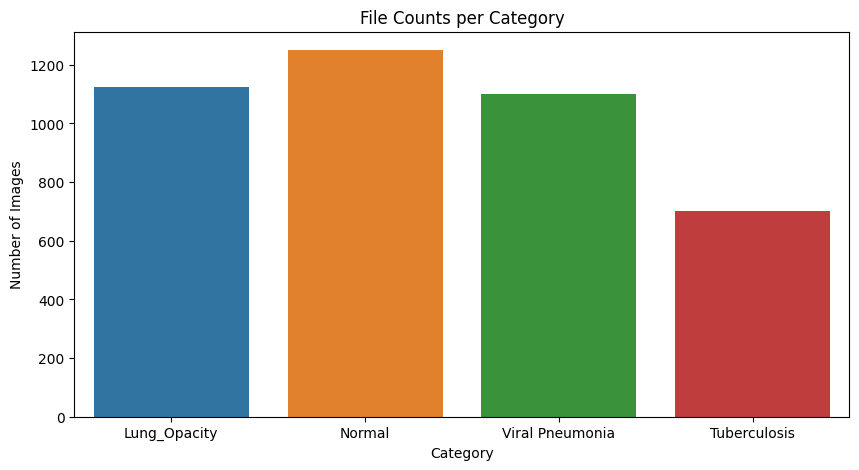

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for plotting

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=file_counts.keys(), y=file_counts.values(), hue=file_counts.keys())
plt.title('File Counts per Category')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.show()

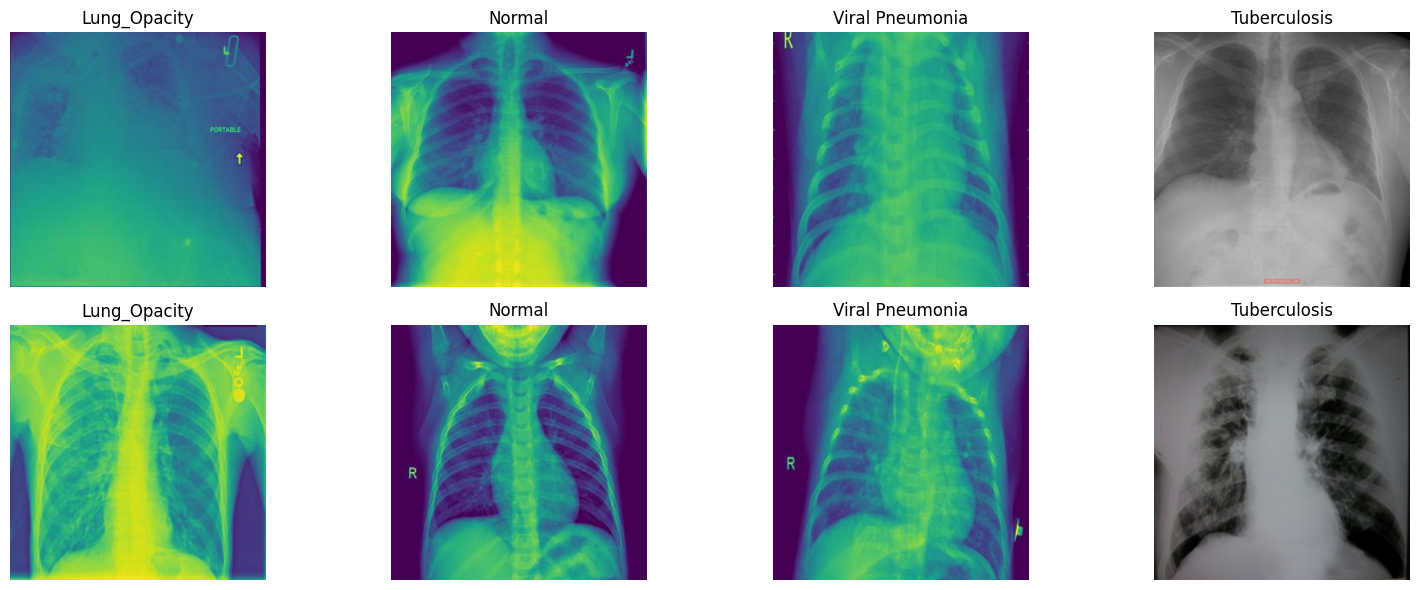

In [13]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

categories = dirs  # ['Lung_Opacity', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
dir_path = '../Final Dataset'  # Dataset Directory

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, category in enumerate(categories):
    folder = os.path.join(dir_path, category)
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    sample_imgs = random.sample(images, 2) if len(images) >= 2 else images
    for j, img_name in enumerate(sample_imgs):

        ax = axes[j, i]
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{category}")
        ax.axis('off')

    for j in range(len(sample_imgs), 2):
        axes[j, i].axis('off')

plt.tight_layout()
plt.show()


#### Importing required modules

In [14]:
!pip install tensorflow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Splitting Dataset into Train Test Validation

In [15]:
!pip install split-folders
import splitfolders

splitfolders.ratio(
    "../Final Dataset",
    output="../Final Dataset Split",
    seed=42,
    ratio=(.7, .2, .1),
    move=False  # Set to  move files instead of copying
)

Copying files: 4175 files [00:01, 2419.94 files/s]


#### Data Augmentation

In [16]:
parent_dir = "../Final Dataset Split"

image_dims = (224, 224)
batch_size = 32

# Train Data Augmentation
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_data.flow_from_directory(
    directory=os.path.join(parent_dir, 'train'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'val'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'test'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2921 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


In [17]:
train_generator.class_indices

{'Lung_Opacity': 0, 'Normal': 1, 'Tuberculosis': 2, 'Viral Pneumonia': 3}

In [18]:
parent_path = "../Final Dataset Split"
dirs = os.listdir(parent_path)
for dir in dirs:
    sub_dir = os.path.join(parent_path, dir)
    folders = os.listdir(sub_dir)
    file_counts = {}
    for f in folders:
        folder_path = os.path.join(f"../Final Dataset Split/{dir}", f)
        if os.path.isdir(folder_path):
            file_count = sum(
                1 for entry in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, entry))
            )

            file_counts[f]=file_count

    print(f"{dir} has {file_counts}")

val has {'Lung_Opacity': 225, 'Normal': 250, 'Viral Pneumonia': 220, 'Tuberculosis': 140}
train has {'Lung_Opacity': 787, 'Normal': 875, 'Viral Pneumonia': 770, 'Tuberculosis': 489}
test has {'Lung_Opacity': 113, 'Normal': 125, 'Viral Pneumonia': 110, 'Tuberculosis': 71}


#### Model Building

In [19]:
model_path = "../code files/trained_model.keras"

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [96]:
# Load MobileNetV2 without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [97]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
history = model.fit(train_generator, epochs=3, verbose=1,
          validation_data=val_generator, callbacks=callbacks_list)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.3234 - loss: 1.5342
Epoch 1: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 579ms/step - accuracy: 0.3243 - loss: 1.5320 - val_accuracy: 0.5928 - val_loss: 0.9908
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6087 - loss: 0.9219
Epoch 2: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.6090 - loss: 0.9214 - val_accuracy: 0.7317 - val_loss: 0.7295
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7367 - loss: 0.6908
Epoch 3: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.7370 - loss: 0.6903 - val_accuracy: 0.8084 - val_loss: 0.5974


####Optimising model

In [99]:
# Unfreeze last 30 layers
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.7058 - loss: 0.7749
Epoch 1: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 609ms/step - accuracy: 0.7065 - loss: 0.7735 - val_accuracy: 0.8431 - val_loss: 0.4702
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8619 - loss: 0.4336
Epoch 2: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 442ms/step - accuracy: 0.8619 - loss: 0.4336 - val_accuracy: 0.8503 - val_loss: 0.4165
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8718 - loss: 0.3731
Epoch 3: val_accuracy did not improve from 0.87186
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.8718 - loss: 0.3730 - val_accuracy: 0.8659 - val_loss: 0.3779


#### Test Accuracy

In [100]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7867 - loss: 0.5718
Test Accuracy: 86.40%


#### Accuracy plot

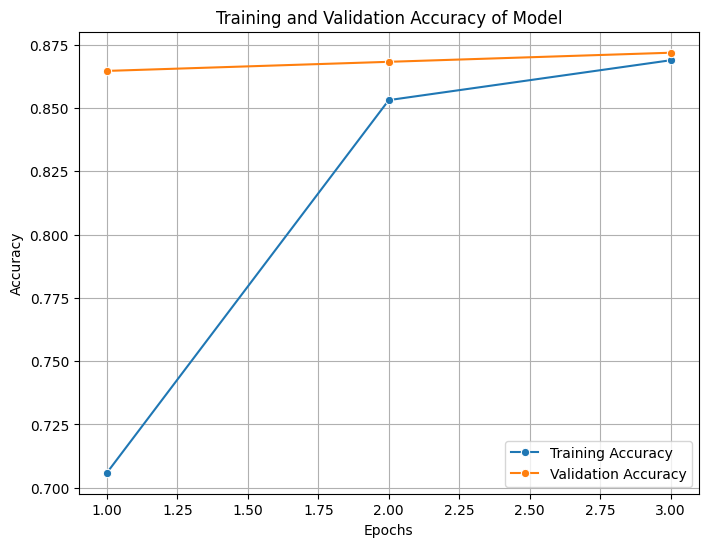

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare DataFrame from Keras history
df = pd.DataFrame({
    "Epoch": range(1, len(history.history['accuracy']) + 1),
    "Training Accuracy": history.history['accuracy'],
    "Validation Accuracy": history.history['val_accuracy']
})

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars="Epoch",
                   value_vars=["Training Accuracy", "Validation Accuracy"],
                   var_name="Type",
                   value_name="Accuracy")

plt.figure(figsize=(8,6))
sns.lineplot(data=df_melted, x="Epoch", y="Accuracy", hue="Type", marker="o")
plt.title('Training and Validation Accuracy of Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title="")
plt.show()

#### Loss Plot

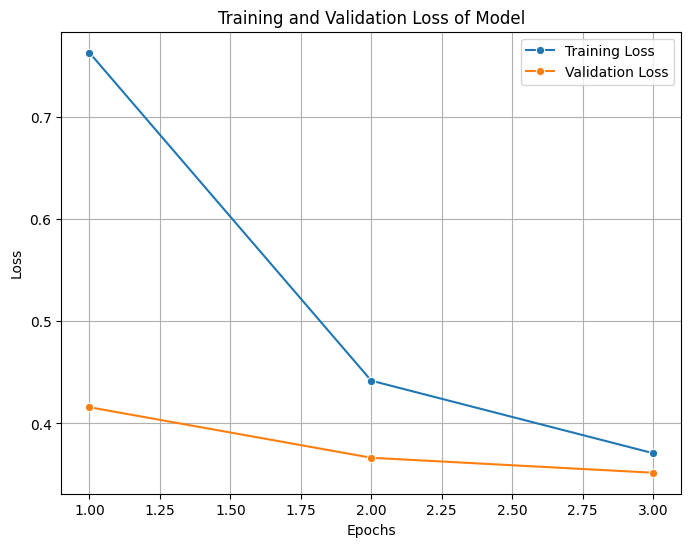

In [27]:
# Prepare DataFrame from Keras history for loss
df_loss = pd.DataFrame({
    "Epoch": range(1, len(history.history['loss']) + 1),
    "Training Loss": history.history['loss'],
    "Validation Loss": history.history['val_loss']
})

# Melt DataFrame for Seaborn
df_loss_melted = df_loss.melt(id_vars="Epoch",
                              value_vars=["Training Loss", "Validation Loss"],
                              var_name="Type",
                              value_name="Loss")

# Plot loss
plt.figure(figsize=(8,6))
sns.lineplot(data=df_loss_melted, x="Epoch", y="Loss", hue="Type", marker="o")
plt.title('Training and Validation Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(title="")
plt.show()

#### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step


# **CNN Model Building**

In [29]:
save_cnn_model = 'models/cnn_model.keras'

In [30]:
cnn_cp = ModelCheckpoint(save_cnn_model, monitor='accuracy', save_best_only=True, mode='max')
cnn_callbacks_list = [cnn_cp]

In [31]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(len(train_generator.class_indices.keys()), activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# cnn_model.compile(optimizer=RMSprop(learning_rate=0.00005),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

In [33]:
cnn_history = cnn_model.fit(train_generator, epochs=3, verbose=1, # Make epochs 20
          validation_data=val_generator, callbacks=cnn_callbacks_list)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 567ms/step - accuracy: 0.5617 - loss: 1.2557 - val_accuracy: 0.2695 - val_loss: 2.3156
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 461ms/step - accuracy: 0.7378 - loss: 0.6871 - val_accuracy: 0.2695 - val_loss: 4.1511
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - accuracy: 0.7669 - loss: 0.5947 - val_accuracy: 0.3210 - val_loss: 4.0441


In [34]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5811 - loss: 2.7421
Test Accuracy: 32.22%


In [35]:
# Predict on test set
cnn_y_pred = cnn_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)

# True labels
cnn_y_true = test_generator.classes

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step


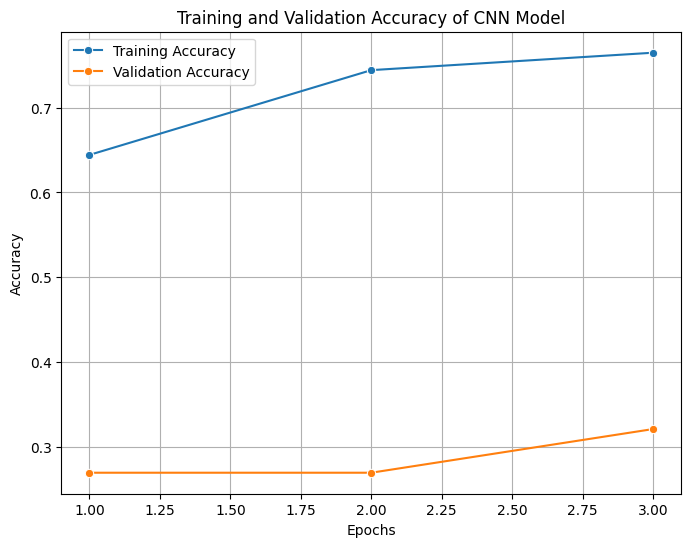

In [36]:
cnn_df = pd.DataFrame({
    "Epoch": range(1, len(cnn_history.history['accuracy']) + 1),
    "Training Accuracy": cnn_history.history['accuracy'],
    "Validation Accuracy": cnn_history.history['val_accuracy']
})

# Melt DataFrame for Seaborn
cnn_df_melted = cnn_df.melt(id_vars="Epoch",
                   value_vars=["Training Accuracy", "Validation Accuracy"],
                   var_name="Type",
                   value_name="Accuracy")

plt.figure(figsize=(8,6))
sns.lineplot(data=cnn_df_melted, x="Epoch", y="Accuracy", hue="Type", marker="o")
plt.title('Training and Validation Accuracy of CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title="")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.322
Precision: 0.321
Recall: 0.327
F1 Score: 0.229


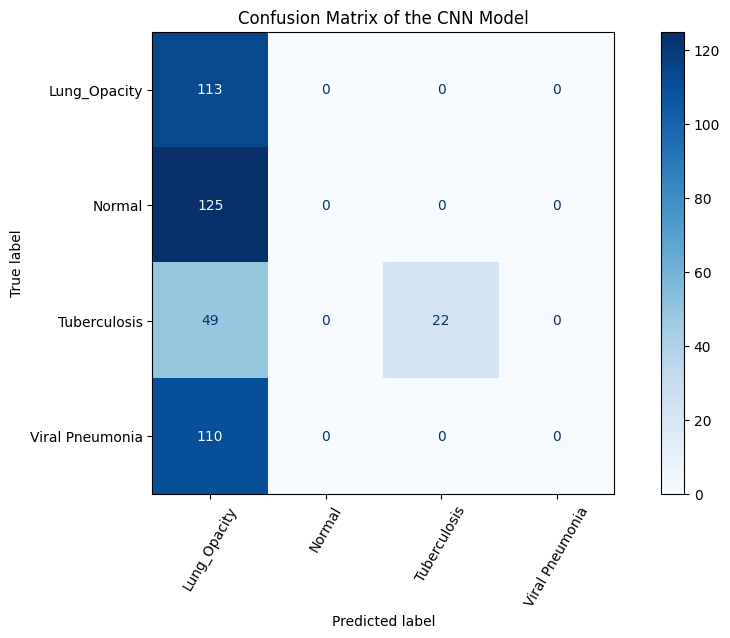

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
# Assuming y_true and y_pred_classes are defined
cnn_cm = confusion_matrix(cnn_y_true, cnn_y_pred_classes)

# Calculate metrics (macro average for multiclass)
cnn_accuracy = accuracy_score(cnn_y_true, cnn_y_pred_classes)
cnn_precision = precision_score(cnn_y_true, cnn_y_pred_classes, average='macro')
cnn_recall = recall_score(cnn_y_true, cnn_y_pred_classes, average='macro')
cnn_f1 = f1_score(cnn_y_true, cnn_y_pred_classes, average='macro')

print(f'Accuracy: {cnn_accuracy:.3f}')
print(f'Precision: {cnn_precision:.3f}')
print(f'Recall: {cnn_recall:.3f}')
print(f'F1 Score: {cnn_f1:.3f}')

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cnn_cm, display_labels=train_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=60)
plt.title('Confusion Matrix of the CNN Model')
plt.show()

# **VGG16 Model Building**

In [38]:
from tensorflow.keras.applications import VGG16


In [40]:
from tensorflow.keras import layers, models

base_model_vgg = VGG16(
    input_shape=(*image_dims, 3),
    include_top=False,
    weights='imagenet'
)

base_model_vgg.trainable = False

inputs_vgg = tf.keras.Input(shape=(*image_dims, 3))
x = base_model_vgg(inputs_vgg, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs_vgg = layers.Dense(4, activation='softmax')(x)

model_vgg = models.Model(inputs=inputs_vgg, outputs=outputs_vgg)

model_vgg.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("VGG16 Model Created")
model_vgg.summary()

VGG16 Model Created


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,428 (56.76 MB)

 Trainable params: 164,740 (643.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [66]:
# Train VGG16
vgg_model_path = '../code files/vgg16_model.keras'

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import math

callbacks_vgg = [
    ModelCheckpoint(vgg_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

history_vgg = model_vgg.fit(
    train_generator,
    steps_per_epoch=math.ceil(train_generator.samples / batch_size),
    epochs=3,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size),
    callbacks=callbacks_vgg,
    verbose=1
)


Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.7873 - loss: 0.5627
Epoch 1: val_accuracy improved from -inf to 0.82874, saving model to ../code files/vgg16_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 530ms/step - accuracy: 0.7873 - loss: 0.5625 - val_accuracy: 0.8287 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8136 - loss: 0.4634
Epoch 2: val_accuracy improved from 0.82874 to 0.83234, saving model to ../code files/vgg16_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 498ms/step - accuracy: 0.8136 - loss: 0.4633 - val_accuracy: 0.8323 - val_loss: 0.3967 - learning_rate: 0.0010
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8381 - loss: 0.4225
Epoch 3: val_accuracy improved from 0.83234 to 0.84671, saving model to ../code files/vgg16_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 512ms/step - accuracy: 0.8382 - loss: 0.4224 - val_accuracy: 0.8467 - val_loss: 0.3634 - learning_rate: 0.0010
Restoring 

In [43]:
# Evaluate VGG16
best_model_vgg = tf.keras.models.load_model(vgg_model_path)
test_loss_vgg, test_acc_vgg = best_model_vgg.evaluate(test_generator)
print(f"\nVGG16 Test Accuracy: {test_acc_vgg*100:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.7751 - loss: 0.5963

VGG16 Test Accuracy: 82.10%


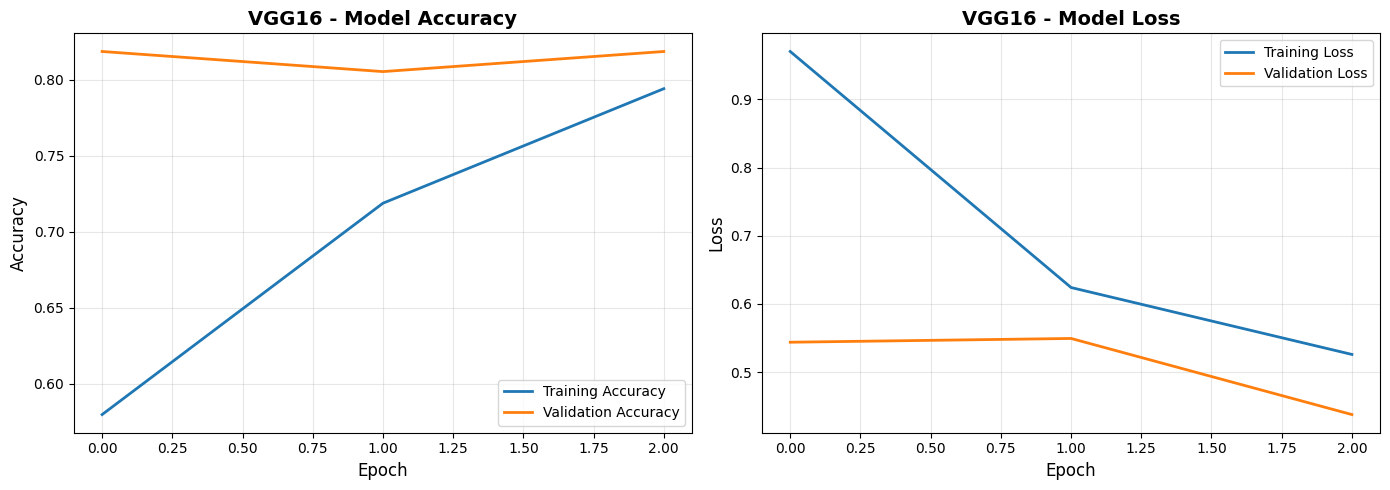

In [56]:
# VGG16 - Training Curves
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('VGG16 - Model Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_vgg.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('VGG16 - Model Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('vgg16_training_curves.png', dpi=300)
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step


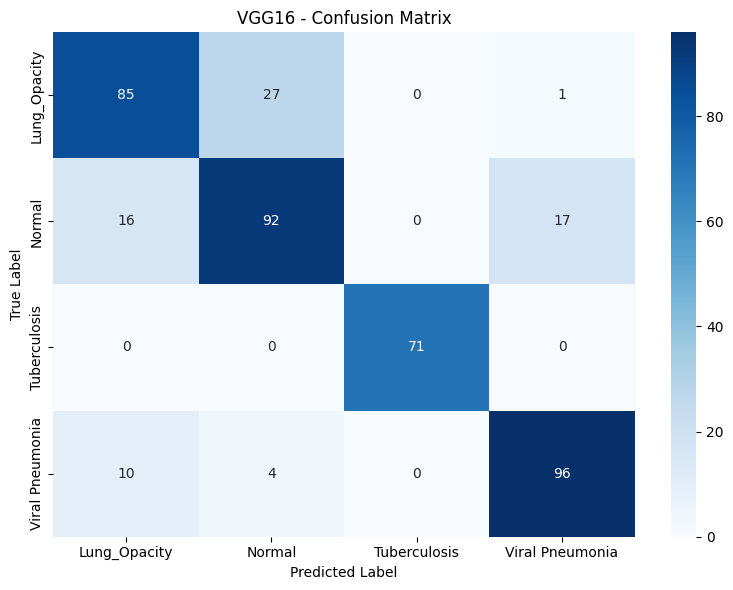


VGG16 Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.77      0.75      0.76       113
         Normal       0.75      0.74      0.74       125
   Tuberculosis       1.00      1.00      1.00        71
Viral Pneumonia       0.84      0.87      0.86       110

       accuracy                           0.82       419
      macro avg       0.84      0.84      0.84       419
   weighted avg       0.82      0.82      0.82       419



In [57]:
# VGG16 - Confusion Matrix and Classification Report
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_vgg = best_model_vgg.predict(test_generator)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm_vgg = confusion_matrix(y_true, y_pred_classes_vgg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('VGG16 - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('vgg16_confusion_matrix.png', dpi=300)
plt.show()

# Classification Report
print("\nVGG16 Classification Report:")
print(classification_report(y_true, y_pred_classes_vgg,
                          target_names=list(test_generator.class_indices.keys())))


# **Model building InceptionV3**

In [44]:
from tensorflow.keras.applications import InceptionV3


In [45]:
# Build InceptionV3 model
base_model_inception = InceptionV3(
    input_shape=(*image_dims, 3),
    include_top=False,
    weights='imagenet'
)

base_model_inception.trainable = False

inputs_inception = tf.keras.Input(shape=(*image_dims, 3))
x = base_model_inception(inputs_inception, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs_inception = layers.Dense(4, activation='softmax')(x)

model_inception = models.Model(inputs=inputs_inception, outputs=outputs_inception)

model_inception.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("InceptionV3 Model Created")
model_inception.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
InceptionV3 Model Created


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,992,420 (87.71 MB)

 Trainable params: 1,185,540 (4.52 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

In [47]:
# Train InceptionV3
inception_model_path = '../code files/inceptionv3_model.keras'

callbacks_inception = [
    ModelCheckpoint(inception_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=3,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=callbacks_inception,
    verbose=1
)


Epoch 1/3
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6825 - loss: 0.9810
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to ../code files/inceptionv3_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 75s 639ms/step - accuracy: 0.6835 - loss: 0.9783 - val_accuracy: 0.7500 - val_loss: 0.5630 - learning_rate: 0.0010
Epoch 2/3
 1/91 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8750 - loss: 0.5487

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.75000
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8750 - loss: 0.5487 - val_accuracy: 0.7464 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 3/3
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8250 - loss: 0.5022
Epoch 3: val_accuracy improved from 0.75000 to 0.87260, saving model to ../code files/inceptionv3_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 44s 486ms/step - accuracy: 0.8250 - loss: 0.5019 - val_accuracy: 0.8726 - val_loss: 0.3445 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.


In [48]:
# Evaluate InceptionV3
best_model_inception = tf.keras.models.load_model(inception_model_path)
test_loss_inception, test_acc_inception = best_model_inception.evaluate(test_generator)
print(f"\nInceptionV3 Test Accuracy: {test_acc_inception*100:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 526ms/step - accuracy: 0.7746 - loss: 0.5322

InceptionV3 Test Accuracy: 84.49%


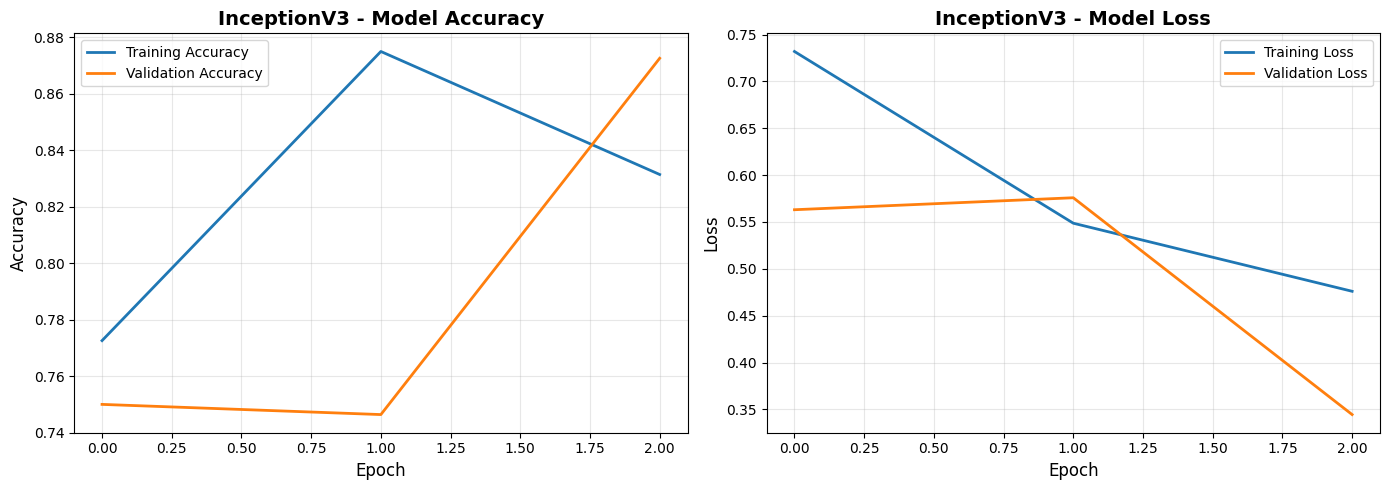

In [58]:
# InceptionV3 - Training Curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('InceptionV3 - Model Accuracy', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_inception.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('InceptionV3 - Model Loss', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('inceptionv3_training_curves.png', dpi=300)
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 616ms/step


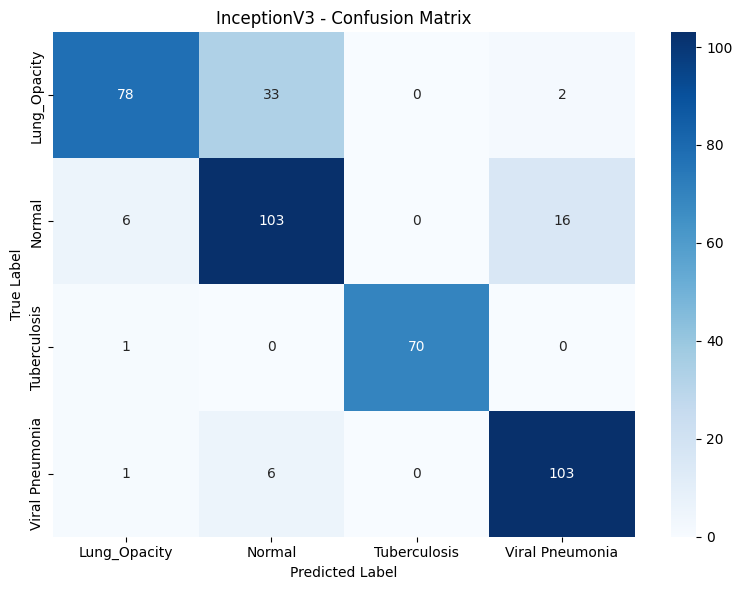


InceptionV3 Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.91      0.69      0.78       113
         Normal       0.73      0.82      0.77       125
   Tuberculosis       1.00      0.99      0.99        71
Viral Pneumonia       0.85      0.94      0.89       110

       accuracy                           0.84       419
      macro avg       0.87      0.86      0.86       419
   weighted avg       0.85      0.84      0.84       419



In [59]:
# InceptionV3 - Confusion Matrix and Classification Report
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_inception = best_model_inception.predict(test_generator)
y_pred_classes_inception = np.argmax(y_pred_inception, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm_inception = confusion_matrix(y_true, y_pred_classes_inception)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('InceptionV3 - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('inceptionv3_confusion_matrix.png', dpi=300)
plt.show()

# Classification Report
print("\nInceptionV3 Classification Report:")
print(classification_report(y_true, y_pred_classes_inception,
                          target_names=list(test_generator.class_indices.keys())))


In [103]:
models_comparison = {
    'MobileNetV2': test_accuracy * 100,
    'Custom CNN': cnn_test_accuracy * 100,
    'VGG16': test_acc_vgg * 100,
    'InceptionV3': test_acc_inception * 100
}

print("="*60)
print("MODEL COMPARISON - TEST ACCURACY")
print("="*60)
for model_name, accuracy in sorted(models_comparison.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name:20s}: {accuracy:.2f}%")
print("="*60)

best_model_name = max(models_comparison, key=models_comparison.get)
best_accuracy = models_comparison[best_model_name]
print(f"\nBEST MODEL: {best_model_name} with {best_accuracy:.2f}% accuracy")


MODEL COMPARISON - TEST ACCURACY
MobileNetV2         : 86.40%
InceptionV3         : 84.49%
VGG16               : 82.10%
Custom CNN          : 32.22%

BEST MODEL: MobileNetV2 with 86.40% accuracy


# **Accuracy Comparison Bar Plot**

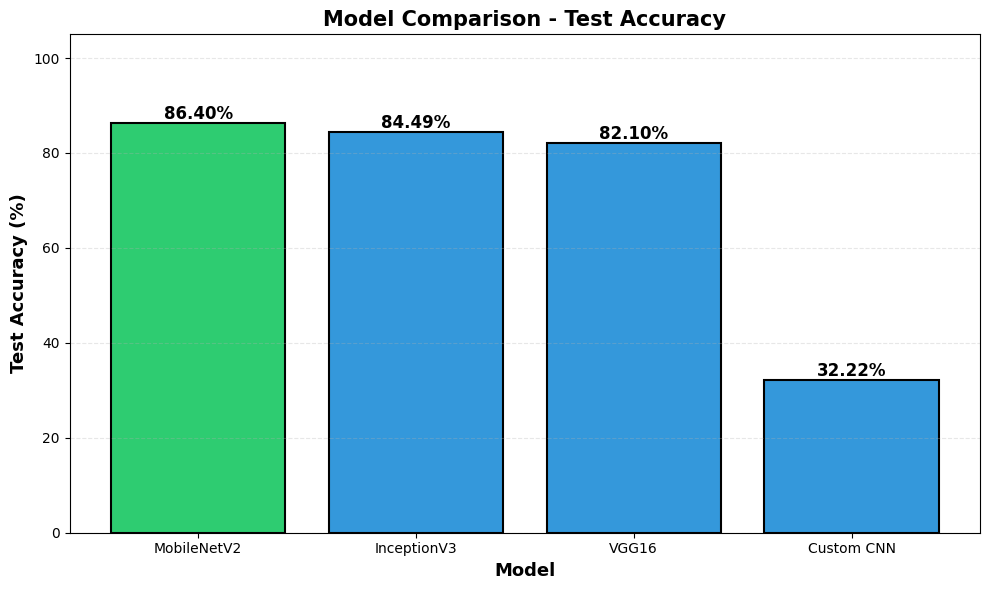

In [104]:
import matplotlib.pyplot as plt
import numpy as np

models = list(models_comparison.keys())
accuracies = list(models_comparison.values())

sorted_indices = np.argsort(accuracies)[::-1]
models_sorted = [models[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

colors = ['#2ecc71' if acc == max(accuracies_sorted) else '#3498db' for acc in accuracies_sorted]

plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, accuracies_sorted, color=colors, edgecolor='black', linewidth=1.5)

for i, (bar, acc) in enumerate(zip(bars, accuracies_sorted)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Model', fontsize=13, fontweight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=13, fontweight='bold')
plt.title('Model Comparison - Test Accuracy', fontsize=15, fontweight='bold')
plt.ylim([0, 105])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('model_comparison_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


# **Training Accuracy Comparison Plot**

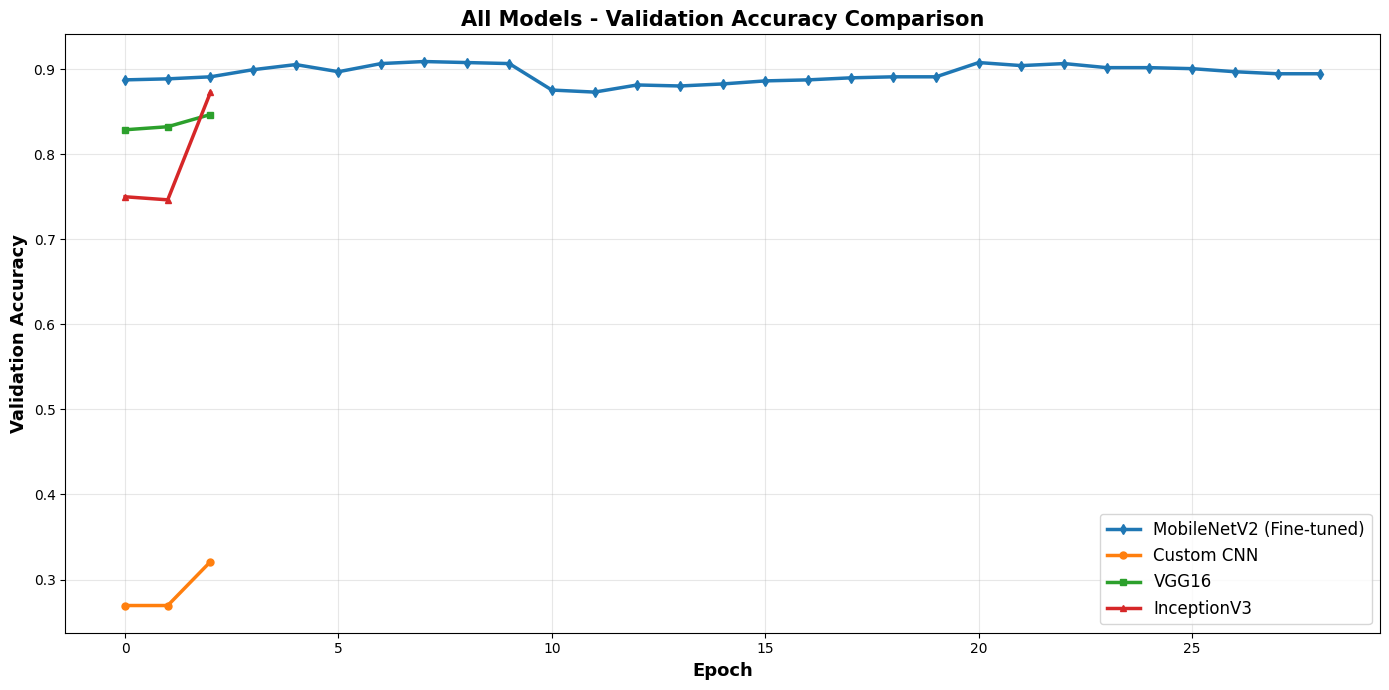

In [72]:
plt.figure(figsize=(14, 7))

plt.plot(all_val_accuracy, label='MobileNetV2 (Fine-tuned)', linewidth=2.5, marker='d', markersize=5)
plt.plot(cnn_history.history['val_accuracy'], label='Custom CNN', linewidth=2.5, marker='o', markersize=5)
plt.plot(history_vgg.history['val_accuracy'], label='VGG16', linewidth=2.5, marker='s', markersize=5)
plt.plot(history_inception.history['val_accuracy'], label='InceptionV3', linewidth=2.5, marker='^', markersize=5)

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Validation Accuracy', fontsize=13, fontweight='bold')
plt.title('All Models - Validation Accuracy Comparison', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('all_models_validation_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


# **Detailed Comparison Table**

In [73]:
import pandas as pd

comparison_data = {
    'Model': list(models_comparison.keys()),
    'Test Accuracy (%)': [f"{acc:.2f}" for acc in models_comparison.values()],
    'Parameters': ['~3.5M', '~15M', '~138M', '~24M'],
    'Type': ['Transfer Learning', 'Custom', 'Transfer Learning', 'Transfer Learning']
}

df_comparison = pd.DataFrame(comparison_data)
df_comparison = df_comparison.sort_values('Test Accuracy (%)', ascending=False).reset_index(drop=True)
df_comparison.index = df_comparison.index + 1

print("\n" + "="*70)
print("DETAILED MODEL COMPARISON TABLE")
print("="*70)
print(df_comparison.to_string(index=True))
print("="*70)

df_comparison.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Comparison saved to 'model_comparison_results.csv'")



DETAILED MODEL COMPARISON TABLE
         Model Test Accuracy (%) Parameters               Type
1  MobileNetV2             89.98      ~3.5M  Transfer Learning
2  InceptionV3             84.49       ~24M  Transfer Learning
3        VGG16             82.10      ~138M  Transfer Learning
4   Custom CNN             32.22       ~15M             Custom

✓ Comparison saved to 'model_comparison_results.csv'


#  **Performance Summary Grid**

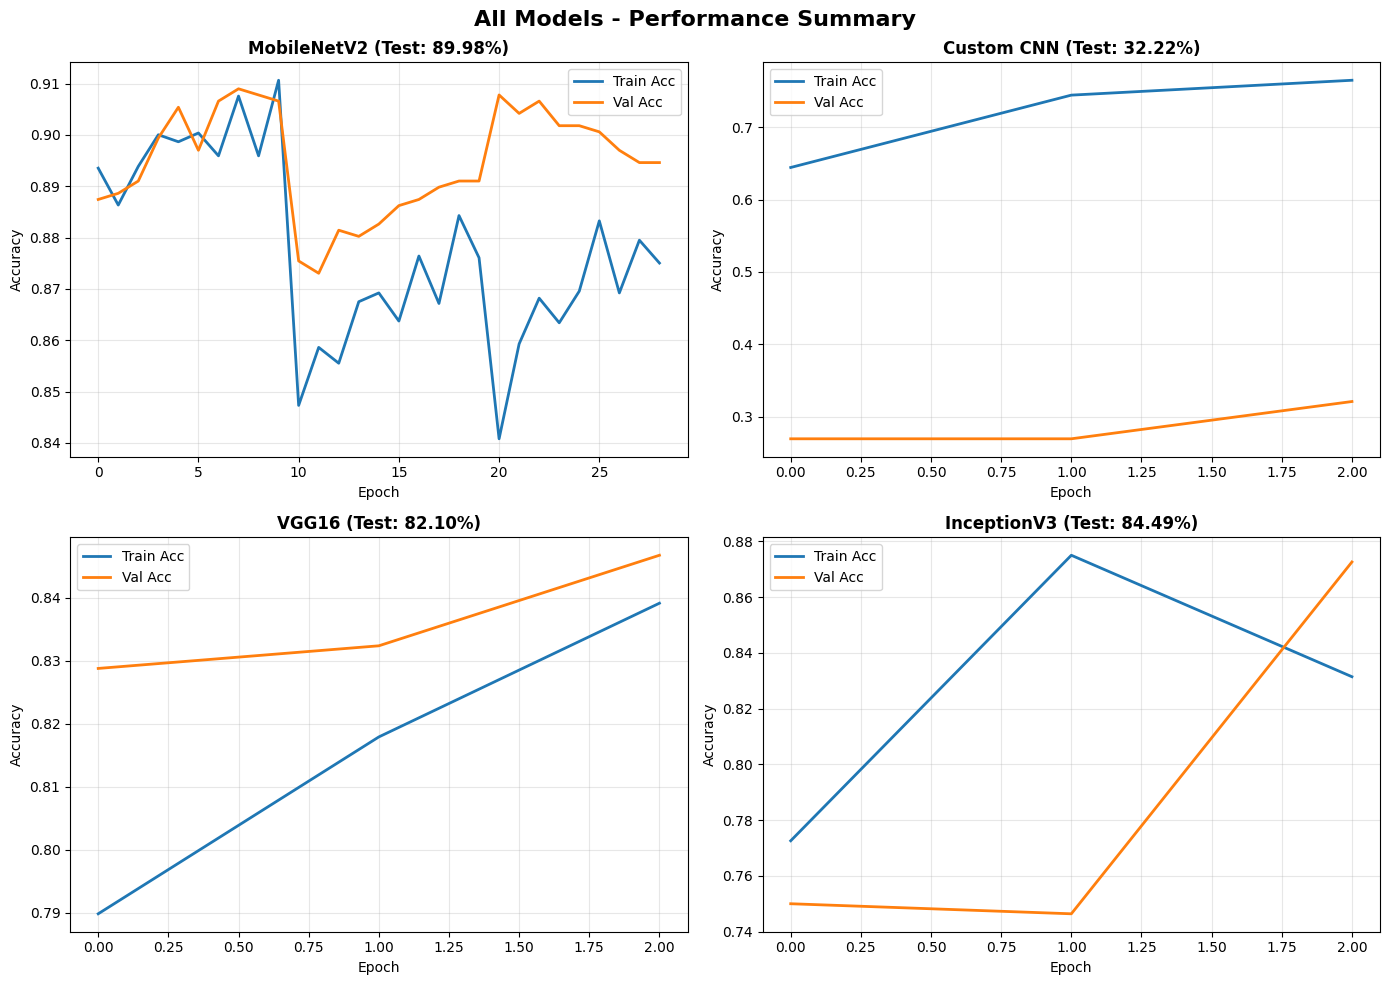

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('All Models - Performance Summary', fontsize=16, fontweight='bold')

model_histories_data = [
    {'name': 'MobileNetV2', 'train_acc': all_accuracy, 'val_acc': all_val_accuracy, 'test_acc': test_accuracy * 100},
    {'name': 'Custom CNN', 'train_acc': cnn_history.history['accuracy'], 'val_acc': cnn_history.history['val_accuracy'], 'test_acc': cnn_test_accuracy * 100},
    {'name': 'VGG16', 'train_acc': history_vgg.history['accuracy'], 'val_acc': history_vgg.history['val_accuracy'], 'test_acc': test_acc_vgg * 100},
    {'name': 'InceptionV3', 'train_acc': history_inception.history['accuracy'], 'val_acc': history_inception.history['val_accuracy'], 'test_acc': test_acc_inception * 100},
]

for idx, model_data in enumerate(model_histories_data):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    ax.plot(model_data['train_acc'], label='Train Acc', linewidth=2)
    ax.plot(model_data['val_acc'], label='Val Acc', linewidth=2)
    ax.set_title(f"{model_data['name']} (Test: {model_data['test_acc']:.2f}%)", fontsize=12, fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('all_models_performance_summary.png', dpi=300, bbox_inches='tight')
plt.show()


In [105]:
print("\n" + "="*70)
print("FINAL MODEL RANKING")
print("="*70)

sorted_models = sorted(models_comparison.items(), key=lambda x: x[1], reverse=True)

for rank, (model_name, accuracy) in enumerate(sorted_models, 1):
    medal = "" if rank == 1 else "" if rank == 2 else "" if rank == 3 else ""
    print(f"{medal} Rank {rank}: {model_name:20s} - {accuracy:.2f}%")

print("="*70)

# Performance difference
best_acc = sorted_models[0][1]
worst_acc = sorted_models[-1][1]
print(f"\n Performance Spread: {best_acc - worst_acc:.2f}% difference between best and worst")
print(f" Average Accuracy: {np.mean(list(models_comparison.values())):.2f}%")
print(f" Best Model: {sorted_models[0][0]} achieved {sorted_models[0][1]:.2f}% accuracy")



FINAL MODEL RANKING
 Rank 1: MobileNetV2          - 86.40%
 Rank 2: InceptionV3          - 84.49%
 Rank 3: VGG16                - 82.10%
 Rank 4: Custom CNN           - 32.22%

 Performance Spread: 54.18% difference between best and worst
 Average Accuracy: 71.30%
 Best Model: MobileNetV2 achieved 86.40% accuracy


# **Fine Tuning**

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# ENHANCED DATA AUGMENTATION

parent_dir = '../Final Dataset Split'
image_dims = (224, 224)
batch_size = 32


train_datagen_enhanced = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    shear_range=0.15
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator_enhanced = train_datagen_enhanced.flow_from_directory(
    directory=os.path.join(parent_dir, 'train'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'val'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'test'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2921 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


# **LOAD YOUR EXISTING MODEL**

In [51]:

model_path = '../code files/trained_model.keras'

# Load your trained model
model = tf.keras.models.load_model(model_path)

print("\n" + "="*60)
print("LOADED MODEL SUMMARY")
print("="*60)
model.summary()


LOADED MODEL SUMMARY


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 5,326,158 (20.32 MB)

 Trainable params: 1,531,524 (5.84 MB)

 Non-trainable params: 731,584 (2.79 MB)

 Optimizer params: 3,063,050 (11.68 MB)

#  **PROGRESSIVE FINE-TUNING**
## STAGE 1: Unfreeze last 50 layers


In [55]:
mobilenet_backbone_layers = model.layers[1:-3]

print(f"\nMobileNetV2 backbone part has {len(mobilenet_backbone_layers)} layers")

# STAGE 1: Unfreeze last 50 layers

print("\n" + "="*60)
print("STAGE 1: Fine-tuning last 50 layers (10 epochs)")
print("="*60)

for layer in mobilenet_backbone_layers[:-50]:
    layer.trainable = False


for layer in mobilenet_backbone_layers[-50:]:
    layer.trainable = True


for layer in model.layers[-3:]:
    layer.trainable = True

print(f"Trainable layers: {sum([1 for layer in model.layers if layer.trainable])}")

# Compile with lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    model_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    verbose=1,
    min_lr=1e-8
)

# Train Stage 1
history_stage1 = model.fit(
    train_generator_enhanced,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

print(f"\n\u2713 Stage 1 Complete - Best Val Accuracy: {max(history_stage1.history['val_accuracy'])*100:.2f}%")



MobileNetV2 backbone part has 153 layers

STAGE 1: Fine-tuning last 50 layers (10 epochs)
Trainable layers: 54
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.8898 - loss: 0.2954
Epoch 1: val_accuracy improved from -inf to 0.88743, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 694ms/step - accuracy: 0.8898 - loss: 0.2954 - val_accuracy: 0.8874 - val_loss: 0.2739 - learning_rate: 5.0000e-06
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.8829 - loss: 0.2941
Epoch 2: val_accuracy improved from 0.88743 to 0.88862, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 578ms/step - accuracy: 0.8830 - loss: 0.2941 - val_accuracy: 0.8886 - val_loss: 0.2654 - learning_rate: 5.0000e-06
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.8863 - loss: 0.2845
Epoch 3: val_accuracy improved from 0.88862 to 0.89102, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━

# STAGE 2: Unfreeze last 80 layers

In [54]:
print("\n" + "="*60)
print("STAGE 2: Fine-tuning last 80 layers (10 epochs)")
print("="*60)

for layer in mobilenet_backbone_layers[:-80]:
    layer.trainable = False

for layer in mobilenet_backbone_layers[-80:]:
    layer.trainable = True

print(f"Trainable layers: {sum([1 for layer in model.layers if layer.trainable])}")

# Compile with even lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=2e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Train Stage 2
history_stage2 = model.fit(
    train_generator_enhanced,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

print(f"\n\u2713 Stage 2 Complete - Best Val Accuracy: {max(history_stage2.history['val_accuracy'])*100:.2f}%")


STAGE 2: Fine-tuning last 80 layers (10 epochs)
Trainable layers: 84
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.8486 - auc: 0.9710 - loss: 0.4120
Epoch 1: val_accuracy improved from 0.87305 to 0.87545, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 724ms/step - accuracy: 0.8486 - auc: 0.9710 - loss: 0.4120 - val_accuracy: 0.8754 - val_auc: 0.9800 - val_loss: 0.3329 - learning_rate: 2.0000e-06
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8638 - auc: 0.9766 - loss: 0.3703
Epoch 2: val_accuracy did not improve from 0.87545
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 502ms/step - accuracy: 0.8638 - auc: 0.9766 - loss: 0.3705 - val_accuracy: 0.8731 - val_auc: 0.9807 - val_loss: 0.3255 - learning_rate: 2.0000e-06
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.8627 - auc: 0.9781 - loss: 0.3587
Epoch 3: val_accuracy improved from 0.87545 to 0.88144, saving model to ../code files/trained_model.keras
92/92 ━━━━━

# **STAGE 3: Full model fine-tuning**

In [61]:
# STAGE 3: Full model fine-tuning

print("\n" + "="*60)
print("STAGE 3: Full model fine-tuning (10 epochs)")
print("="*60)

# Unfreeze all layers
for layer in mobilenet_backbone_layers:
    layer.trainable = True

print(f"Trainable layers: {sum([1 for layer in model.layers if layer.trainable])}")

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Train Stage 3
history_stage3 = model.fit(
    train_generator_enhanced,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, reduce_lr],
    verbose=1
)

print(f"\n\u2713 Stage 3 Complete - Best Val Accuracy: {max(history_stage3.history['val_accuracy'])*100:.2f}%")


STAGE 3: Full model fine-tuning (10 epochs)
Trainable layers: 157
Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.8386 - auc: 0.9713 - loss: 0.4010
Epoch 1: val_accuracy did not improve from 0.90898
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 886ms/step - accuracy: 0.8387 - auc: 0.9713 - loss: 0.4009 - val_accuracy: 0.9078 - val_auc: 0.9902 - val_loss: 0.2204 - learning_rate: 1.0000e-06
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.8499 - auc: 0.9716 - loss: 0.3977
Epoch 2: val_accuracy did not improve from 0.90898
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 580ms/step - accuracy: 0.8500 - auc: 0.9717 - loss: 0.3974 - val_accuracy: 0.9042 - val_auc: 0.9902 - val_loss: 0.2198 - learning_rate: 1.0000e-06
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.8635 - auc: 0.9771 - loss: 0.3566
Epoch 3: val_accuracy did not improve from 0.90898
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 513ms/step - accuracy: 0.8636 - auc: 0.9771 - loss: 0.3565 - val_accuracy: 0.9066 - val_auc:

# **FINAL EVALUATION**


In [63]:
print("\n" + "="*60)
print("LOADING BEST MODEL AND EVALUATING")
print("="*60)

# Load best model
best_model = tf.keras.models.load_model(model_path)

# Evaluate on test set
test_results = best_model.evaluate(test_generator, verbose=1)
test_loss = test_results[0]
test_accuracy = test_results[1]
test_auc = test_results[2] if len(test_results) > 2 else 0

print(f"\n{'='*60}")
print(f"FINAL TEST RESULTS:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test AUC: {test_auc:.4f}")
print(f"{'='*60}")

y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


LOADING BEST MODEL AND EVALUATING
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.8711 - loss: 0.3180

FINAL TEST RESULTS:
Test Loss: 0.2573
Test Accuracy: 89.98%
Test AUC: 0.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

   Lung_Opacity       0.88      0.88      0.88       113
         Normal       0.86      0.80      0.83       125
   Tuberculosis       1.00      1.00      1.00        71
Viral Pneumonia       0.89      0.97      0.93       110

       accuracy                           0.90       419
      macro avg       0.91      0.91      0.91       419
   weighted avg       0.90      0.90      0.90       419


Confusion Matrix:
[[ 99  13   0   1]
 [ 13 100   0  12]
 [  0   0  71   0]
 [  0   3   0 107]]


#  **PLOT TRAINING HISTORY**


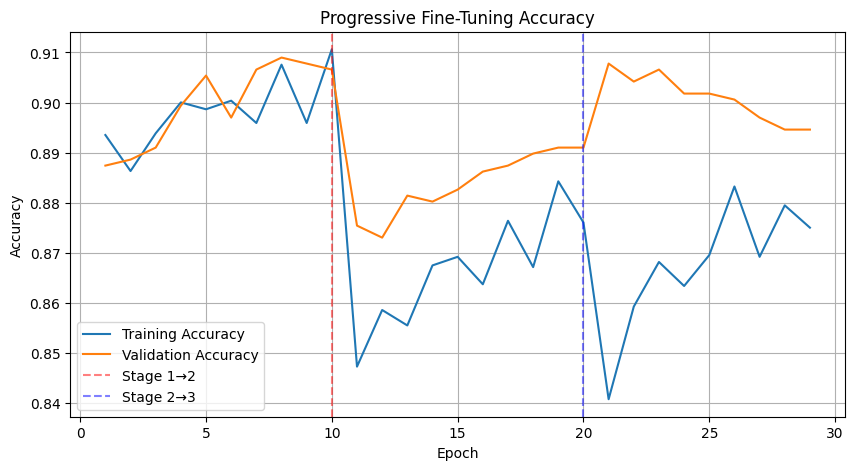


✓ Fine-tuning complete! Model saved to: ../code files/trained_model.keras


In [65]:
import matplotlib.pyplot as plt

# Combine all histories
all_accuracy = history_stage1.history['accuracy'] + history_stage2.history['accuracy'] + history_stage3.history['accuracy']
all_val_accuracy = history_stage1.history['val_accuracy'] + history_stage2.history['val_accuracy'] + history_stage3.history['val_accuracy']

epochs_range = range(1, len(all_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, all_accuracy, label='Training Accuracy')
plt.plot(epochs_range, all_val_accuracy, label='Validation Accuracy')
plt.axvline(x=10, color='r', linestyle='--', alpha=0.5, label='Stage 1\u21922')
plt.axvline(x=20, color='b', linestyle='--', alpha=0.5, label='Stage 2\u21923')
plt.legend()
plt.title('Progressive Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('fine_tuning_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n\u2713 Fine-tuning complete! Model saved to:", model_path)

# **MobileNetV2 - Learning Curves (Accuracy)**

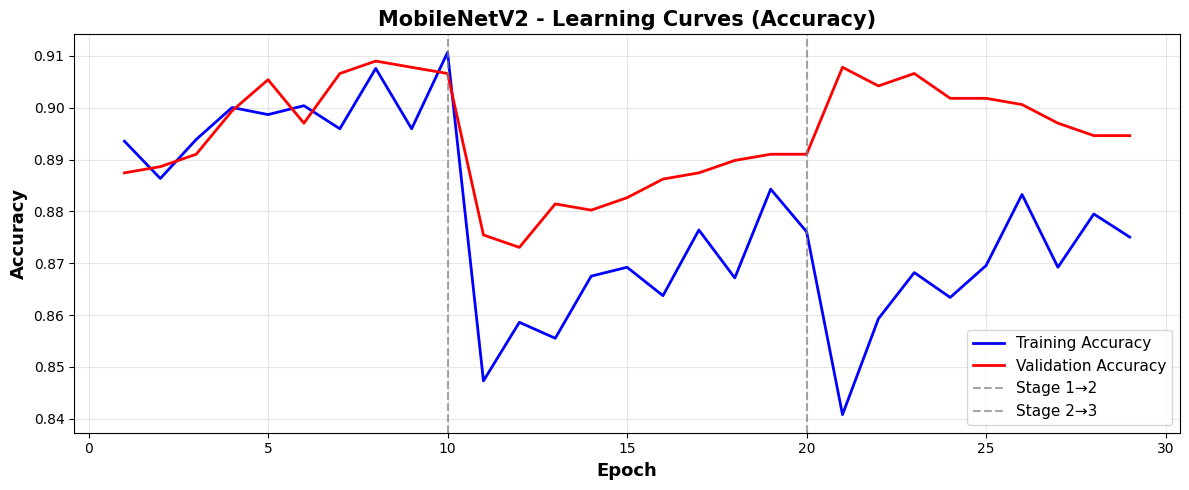

In [81]:
plt.figure(figsize=(12, 5))

# Combine all 3 stages
all_train_acc = (history_stage1.history['accuracy'] +
                 history_stage2.history['accuracy'] +
                 history_stage3.history['accuracy'])
all_val_acc = (history_stage1.history['val_accuracy'] +
               history_stage2.history['val_accuracy'] +
               history_stage3.history['val_accuracy'])

epochs = range(1, len(all_train_acc) + 1)

plt.plot(epochs, all_train_acc, 'b-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, all_val_acc, 'r-', linewidth=2, label='Validation Accuracy')

# Mark stage transitions
plt.axvline(x=10, color='gray', linestyle='--', alpha=0.7, label='Stage 1→2')
plt.axvline(x=20, color='gray', linestyle='--', alpha=0.7, label='Stage 2→3')

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.title('MobileNetV2 - Learning Curves (Accuracy)', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mobilenet_learning_curves_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


# **MobileNetV2 - Loss Curves**

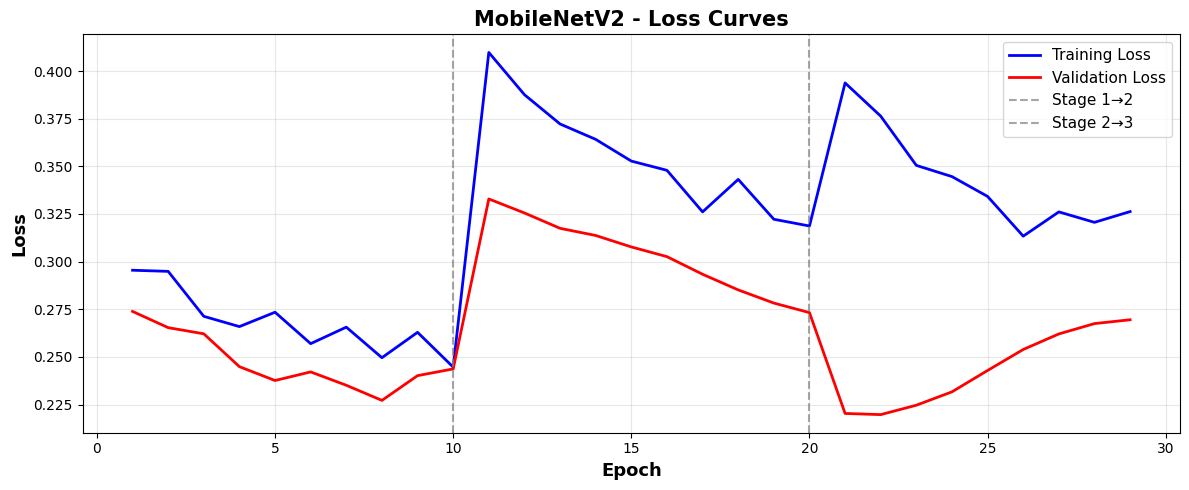

In [82]:
plt.figure(figsize=(12, 5))

# Combine all 3 stages
all_train_loss = (history_stage1.history['loss'] +
                  history_stage2.history['loss'] +
                  history_stage3.history['loss'])
all_val_loss = (history_stage1.history['val_loss'] +
                history_stage2.history['val_loss'] +
                history_stage3.history['val_loss'])

epochs = range(1, len(all_train_loss) + 1)

plt.plot(epochs, all_train_loss, 'b-', linewidth=2, label='Training Loss')
plt.plot(epochs, all_val_loss, 'r-', linewidth=2, label='Validation Loss')

# Mark stage transitions
plt.axvline(x=10, color='gray', linestyle='--', alpha=0.7, label='Stage 1→2')
plt.axvline(x=20, color='gray', linestyle='--', alpha=0.7, label='Stage 2→3')

plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.title('MobileNetV2 - Loss Curves', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mobilenet_loss_curves.png', dpi=300, bbox_inches='tight')
plt.show()


# **MobileNetV2 - Training Curves (Combined)**

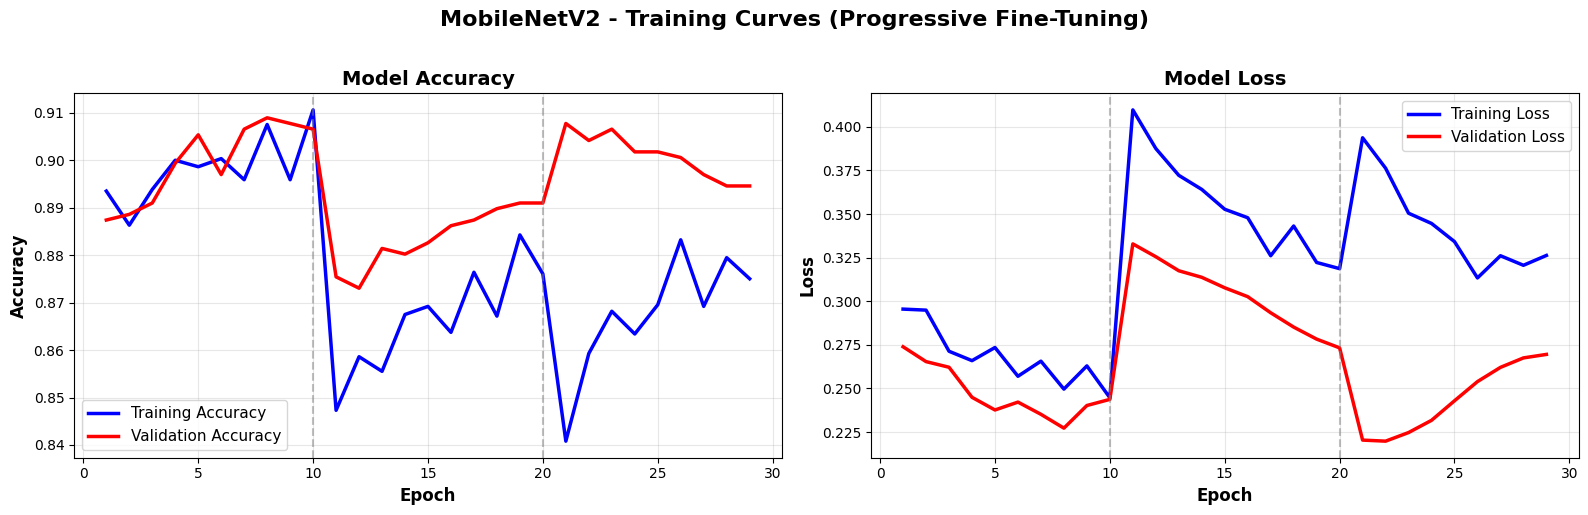

In [83]:
# MobileNetV2 - Training Curves (Combined)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Accuracy subplot
axes[0].plot(epochs, all_train_acc, 'b-', linewidth=2.5, label='Training Accuracy')
axes[0].plot(epochs, all_val_acc, 'r-', linewidth=2.5, label='Validation Accuracy')
axes[0].axvline(x=10, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=20, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Loss subplot
axes[1].plot(epochs, all_train_loss, 'b-', linewidth=2.5, label='Training Loss')
axes[1].plot(epochs, all_val_loss, 'r-', linewidth=2.5, label='Validation Loss')
axes[1].axvline(x=10, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=20, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

fig.suptitle('MobileNetV2 - Training Curves (Progressive Fine-Tuning)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('mobilenet_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()


#  **MobileNetV2 - Confusion Matrix**

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step


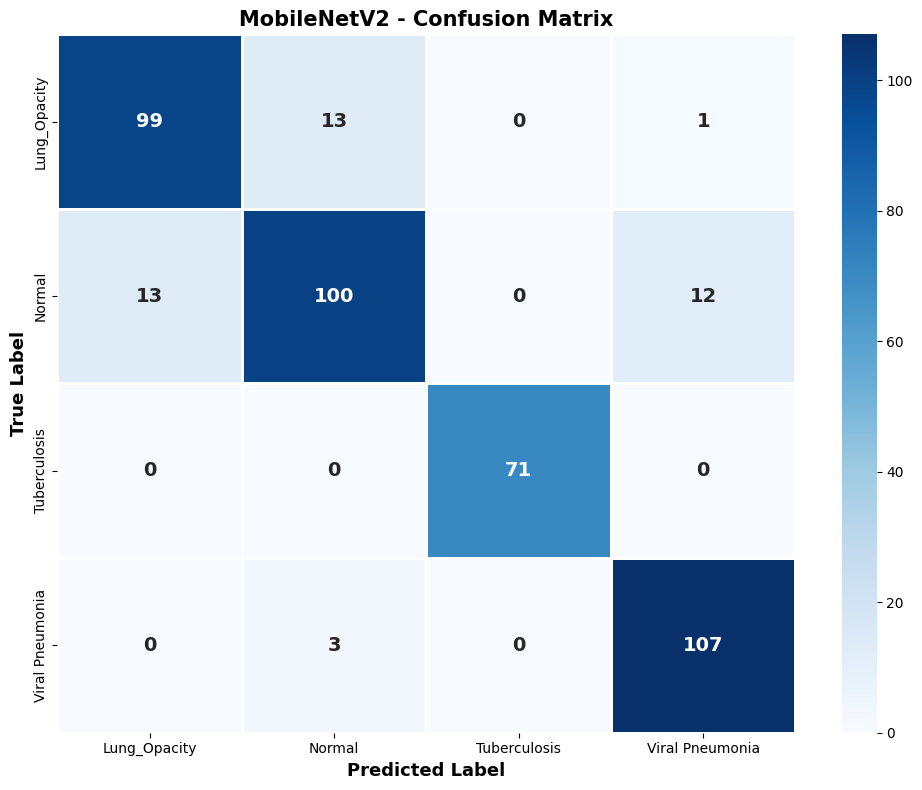


MobileNetV2 - Classification Report
                 precision    recall  f1-score   support

   Lung_Opacity       0.88      0.88      0.88       113
         Normal       0.86      0.80      0.83       125
   Tuberculosis       1.00      1.00      1.00        71
Viral Pneumonia       0.89      0.97      0.93       110

       accuracy                           0.90       419
      macro avg       0.91      0.91      0.91       419
   weighted avg       0.90      0.90      0.90       419



In [84]:
#  MobileNetV2 - Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load best model and get predictions
best_model = tf.keras.models.load_model(model_path)
y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names,
            yticklabels=class_names,
            linewidths=2, linecolor='white',
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.title('MobileNetV2 - Confusion Matrix', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('mobilenet_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\n" + "="*70)
print("MobileNetV2 - Classification Report")
print("="*70)
print(classification_report(y_true, y_pred_classes, target_names=class_names))


#  **MobileNetV2 - ROC Curve (Multi-class)**

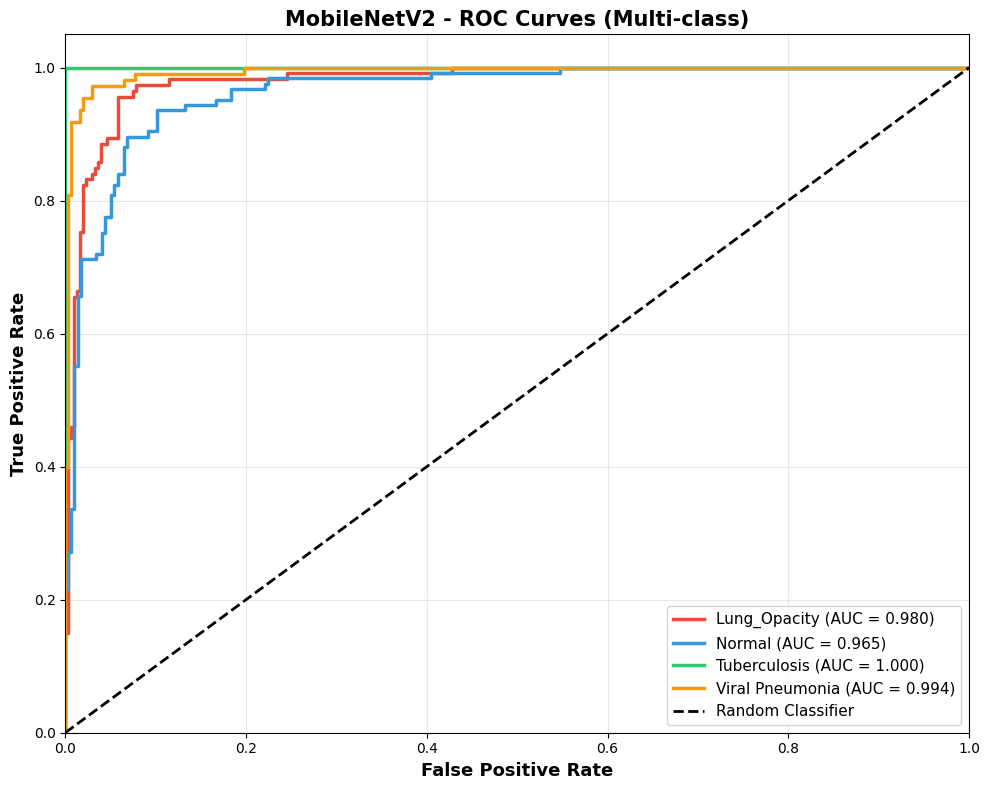


Average AUC: 0.984


In [85]:
#  MobileNetV2 - ROC Curve (Multi-class)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
n_classes = len(class_names)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.5,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('MobileNetV2 - ROC Curves (Multi-class)', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mobilenet_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAverage AUC: {np.mean(list(roc_auc.values())):.3f}")


# **Comparative Bar Chart - Test Accuracy**

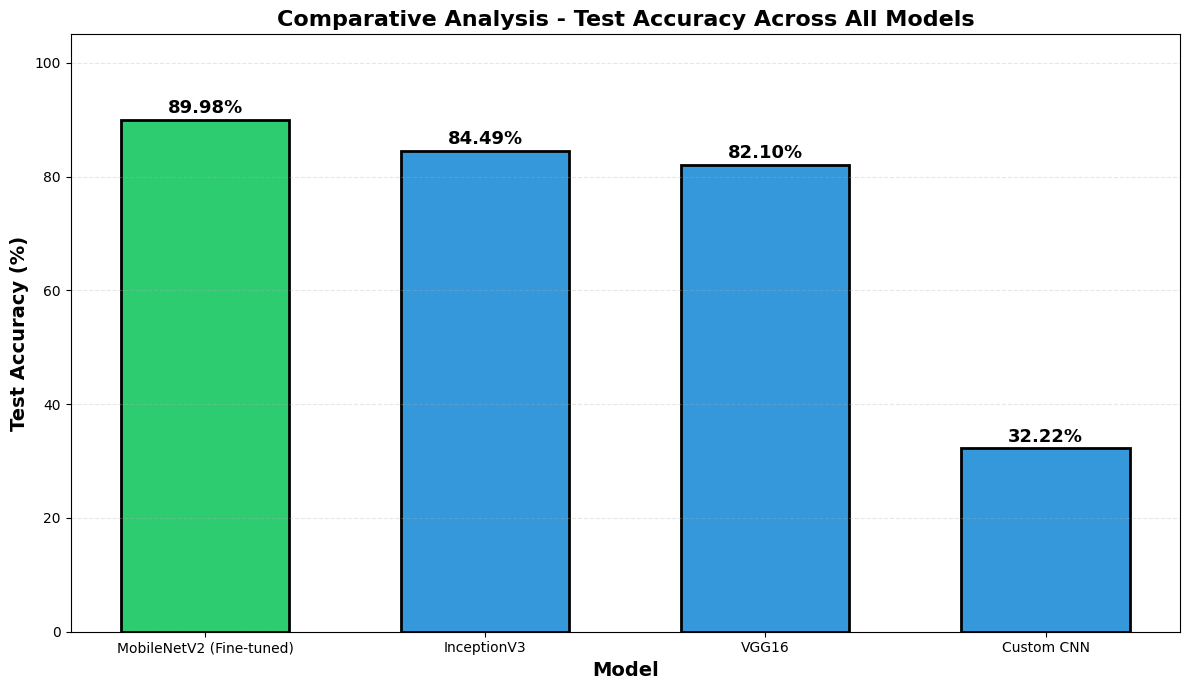


MODEL RANKING BY TEST ACCURACY
Rank 1: MobileNetV2 (Fine-tuned)       - 89.98%
Rank 2: InceptionV3                    - 84.49%
Rank 3: VGG16                          - 82.10%
Rank 4: Custom CNN                     - 32.22%


In [89]:
models_comparison = {
    'MobileNetV2 (Fine-tuned)': test_accuracy * 100,
    'Custom CNN':  cnn_test_accuracy * 100,
    'VGG16': test_acc_vgg * 100,
    'InceptionV3': test_acc_inception * 100
}

models = list(models_comparison.keys())
accuracies = list(models_comparison.values())

sorted_indices = np.argsort(accuracies)[::-1]
models_sorted = [models[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

colors = ['#2ecc71' if acc == max(accuracies_sorted) else '#3498db' for acc in accuracies_sorted]

plt.figure(figsize=(12, 7))
bars = plt.bar(models_sorted, accuracies_sorted, color=colors, edgecolor='black', linewidth=2, width=0.6)

for bar, acc in zip(bars, accuracies_sorted):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Comparative Analysis - Test Accuracy Across All Models', fontsize=16, fontweight='bold')
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('comparative_bar_chart_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n' + '='*70)
print('MODEL RANKING BY TEST ACCURACY')
print('='*70)
for rank, (model, acc) in enumerate(zip(models_sorted, accuracies_sorted), 1):
    print(f'Rank {rank}: {model:30s} - {acc:.2f}%')
print('='*70)


# **Model Comparison with Multiple Metrics**

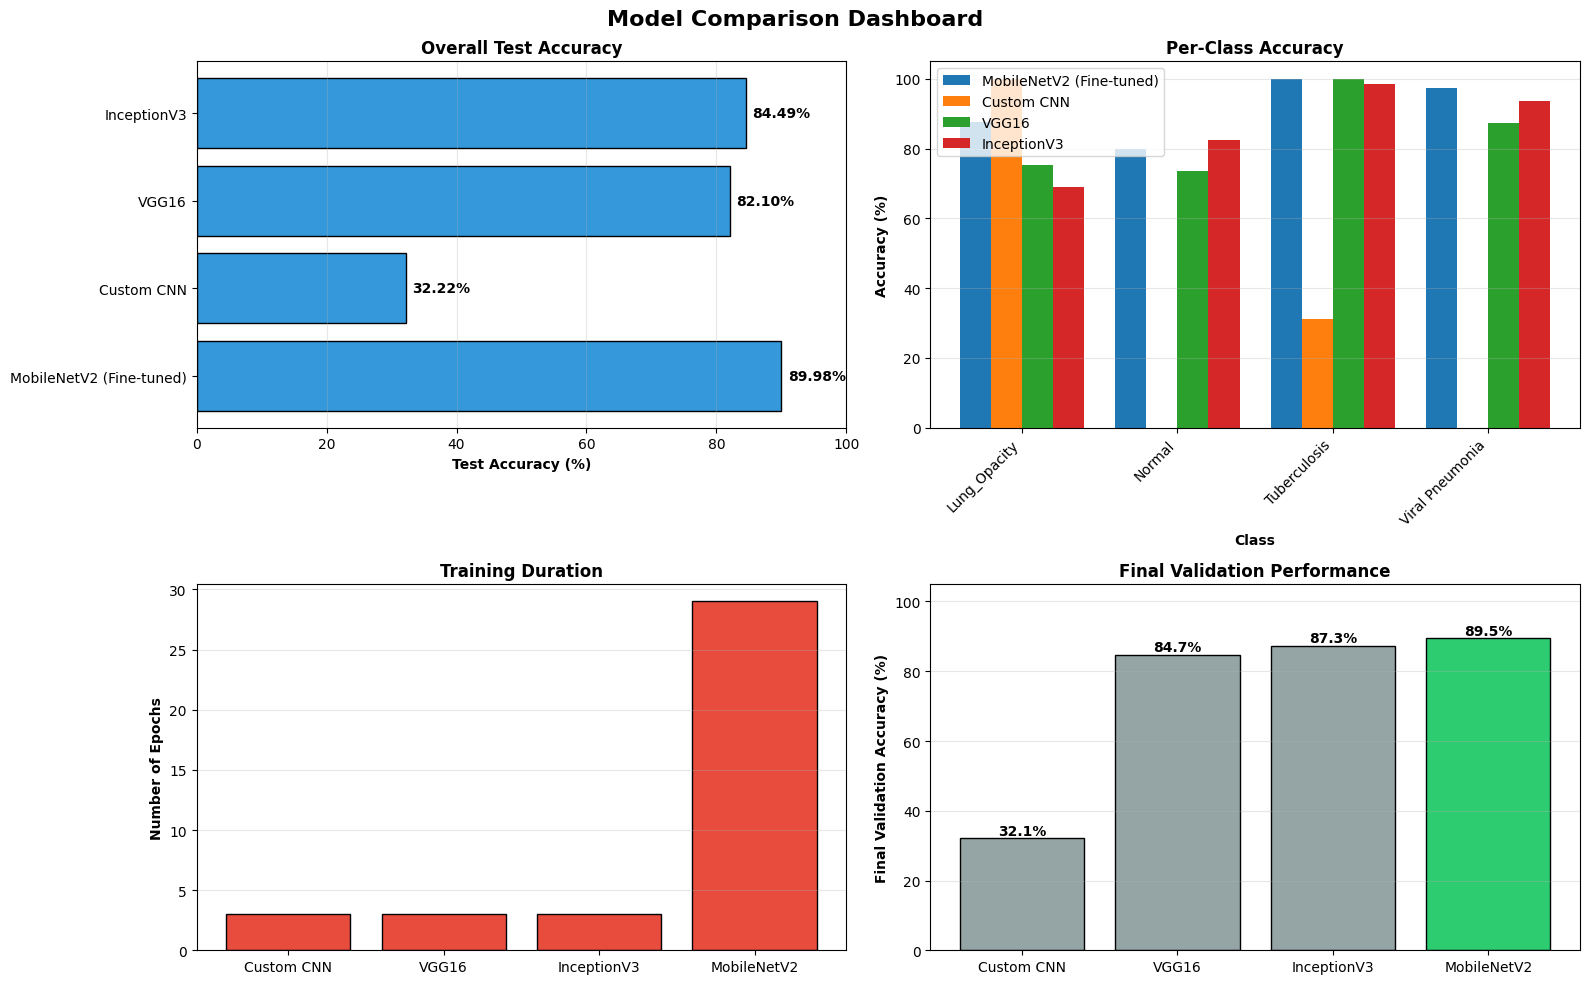

In [91]:
import numpy as np
from sklearn.metrics import confusion_matrix

per_class_acc = {}

# MobileNetV2 (Fine-tuned)
cm_mobilenet = confusion_matrix(y_true, y_pred_classes)
per_class_recall_mobilenet = cm_mobilenet.diagonal() / cm_mobilenet.sum(axis=1)
per_class_acc['MobileNetV2 (Fine-tuned)'] = (per_class_recall_mobilenet * 100).tolist()

# Custom CNN
cm_cnn = confusion_matrix(cnn_y_true, cnn_y_pred_classes)

with np.errstate(divide='ignore', invalid='ignore'):
    per_class_recall_cnn = np.nan_to_num(cm_cnn.diagonal() / cm_cnn.sum(axis=1))
per_class_acc['Custom CNN'] = (per_class_recall_cnn * 100).tolist()

# VGG16
cm_vgg = confusion_matrix(y_true, y_pred_classes_vgg)
per_class_recall_vgg = cm_vgg.diagonal() / cm_vgg.sum(axis=1)
per_class_acc['VGG16'] = (per_class_recall_vgg * 100).tolist()

# InceptionV3
cm_inception = confusion_matrix(y_true, y_pred_classes_inception)
per_class_recall_inception = cm_inception.diagonal() / cm_inception.sum(axis=1)
per_class_acc['InceptionV3'] = (per_class_recall_inception * 100).tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Comparison Dashboard', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
models_list = list(models_comparison.keys())
accuracies_list = list(models_comparison.values())
ax1.barh(models_list, accuracies_list, color='#3498db', edgecolor='black')
ax1.set_xlabel('Test Accuracy (%)', fontweight='bold')
ax1.set_title('Overall Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_xlim([0, 100])
for i, v in enumerate(accuracies_list):
    ax1.text(v + 1, i, f'{v:.2f}%', va='center', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

ax2 = axes[0, 1]
x = np.arange(len(class_names))
width = 0.2

for idx, (model_name, class_accs) in enumerate(per_class_acc.items()):
    ax2.bar(x + idx*width, class_accs, width, label=model_name)
ax2.set_xlabel('Class', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('Per-Class Accuracy', fontsize=12, fontweight='bold')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(class_names, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

ax3 = axes[1, 0]
train_epochs = [
    len(cnn_history.history['val_accuracy']),
    len(history_vgg.history['val_accuracy']),
    len(history_inception.history['val_accuracy']),
    len(all_val_acc)
]
model_names_short = ['Custom CNN', 'VGG16', 'InceptionV3', 'MobileNetV2']
ax3.bar(model_names_short, train_epochs, color='#e74c3c', edgecolor='black')
ax3.set_ylabel('Number of Epochs', fontweight='bold')
ax3.set_title('Training Duration', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
final_val_acc = [
    cnn_history.history['val_accuracy'][-1] * 100,
    history_vgg.history['val_accuracy'][-1] * 100,
    history_inception.history['val_accuracy'][-1] * 100,
    all_val_acc[-1] * 100
]
colors_final = ['#2ecc71' if acc == max(final_val_acc) else '#95a5a6' for acc in final_val_acc]
ax4.bar(model_names_short, final_val_acc, color=colors_final, edgecolor='black')
ax4.set_ylabel('Final Validation Accuracy (%)', fontweight='bold')
ax4.set_title('Final Validation Performance', fontsize=12, fontweight='bold')
ax4.set_ylim([0, 105])
for i, v in enumerate(final_val_acc):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()